<a href="https://colab.research.google.com/github/ShreyaBage/Data-Science-Projects/blob/main/SMS_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP - SMS Spam Detection

Common NLP tasks

1. Identifiying entities-name,place or object that is being discussed about.
2. Understanding the sentiment behind the text happy, sad, disappointed etc.
3. Finding grammatical mistakes in the writing.
4. Can fill in the blanks in sentences.
5. Give an answer to a question.
6. Translating text from one language to another.








# **Introduction to the Naive Bayes Theorem**

Its a very interesting mathematical machine learning algorithm that can help us predict if a message is spam or not.

Take an example of words Dear, Friend, Lunch and Money. We will calculate the probablity of each of those words appearing in a normal message and then the probablity of them appearing in spam.

We will also calculate the probability of a message being normal vs spam irrespective of what is written in the message. P(N) & P(S)

Lets say if we want to determine whether a message 'Dear Friend' is spam or not.
P(N) * P(of the word Dear in a normal msg) *P(of the word friend in a normal message)

Do the same for P(S). Which ever one is the higher number it is assumed that is the answer.

In [ ]:
import pandas as pd

# Load the Red Wine Quality dataset
df1 = pd.read_csv('spam.csv', encoding='latin1')

In [ ]:
print(df1.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
# Drop the columns with NaN values
df1_cleaned = df1.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Print the first few rows of the cleaned DataFrame
print(df1_cleaned.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


# Data Preprocessing



The provided code snippet replaces the values 'ham' with 0 and 'spam' with 1 in the 'v1' column of a DataFrame called df1_cleaned. This is a common preprocessing step in text classification tasks where 'ham' and 'spam' are often used as labels for classifying messages into legitimate (ham) or spam categories.

In [ ]:
# Replace 'ham' with 0 and 'spam' with 1 in the 'v1' column
df1_cleaned['v1'] = df1_cleaned['v1'].replace({'ham': 0, 'spam': 1})

# Print the first few rows to verify the conversion
print(df1_cleaned.head())

   v1                                                 v2
0   0  Go until jurong point, crazy.. Available only ...
1   0                      Ok lar... Joking wif u oni...
2   1  Free entry in 2 a wkly comp to win FA Cup fina...
3   0  U dun say so early hor... U c already then say...
4   0  Nah I don't think he goes to usf, he lives aro...


# Bag of Words

Here we'd like to introduce the Bag of Words(BoW) concept which is a term used to specify the problems that have a 'bag of words' or a collection of text data that needs to be worked with. The basic idea of BoW is to take a piece of text and count the frequency of the words in that text. It is important to note that the BoW concept treats each word individually and the order in which the words occur does not matter.

To handle this, we will be using sklearns count vectorizer method which does the following:

It tokenizes the string(separates the string into individual words) and gives an integer ID to each token.
It counts the occurrence of each of those tokens.

he CountVectorizer method automatically converts all tokenized words to their lower case form so that it does not treat words like 'He' and 'he' differently. It does this using the lowercase parameter which is by default set to True.

It also ignores all punctuation so that words followed by a punctuation mark (for example: 'hello!') are not treated differently than the same words not prefixed or suffixed by a punctuation mark (for example: 'hello').

The third parameter to take note of is the stop_words parameter. Stop words refer to the most commonly used words in a language. They include words like 'am', 'an', 'and', 'the' etc. By setting this parameter value to english



In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# NLTK Library

Corpora: NLTK provides access to various corpora, which are large collections of text for research and analysis. These corpora cover a wide range of languages and domains.

Tokenization: NLTK offers tokenizers for breaking text into individual words or sentences. Tokenization is an essential step in natural language processing tasks.

Part-of-Speech (POS) Tagging: NLTK includes tools for identifying the part of speech (e.g., noun, verb, adjective) of each word in a sentence.

Parsing: It supports parsing techniques to analyze the grammatical structure of sentences and to identify relationships between words.

Named Entity Recognition (NER): NLTK provides tools for identifying named entities such as people, organizations, and locations in text.

WordNet Integration: NLTK includes interfaces to WordNet, a lexical database of English. WordNet provides information about word meanings, synonyms, antonyms, and more.

Machine Learning: NLTK offers support for various machine learning algorithms and techniques, making it suitable for tasks such as text classification, sentiment analysis, and information retrieval.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Assuming 'data' is your DataFrame containing the SMS data
# with columns 'v1' for labels and 'v2' for text messages
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')  # Update this with your actual file path

# Text preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Tokenize
    tokens = word_tokenize(text.lower())

    # Remove stopwords and punctuations, and then lemmatize
    filtered_tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalnum() and w not in stop_words]

    return ' '.join(filtered_tokens)

# Apply text preprocessing
data['processed_text'] = data['v2'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


Term Frequency (TF): Measures the frequency of a term in a document. It is calculated as the number of times a term appears in a document divided by the total number of terms in the document.

Inverse Document Frequency (IDF): Measures the importance of a term across a collection of documents. It is calculated as the logarithm of the total number of documents divided by the number of documents containing the term.

TF-IDF Score: It is obtained by multiplying the TF and IDF scores. It represents how important a term is to a document in a corpus.

The TF-IDF Vectorizer converts a collection of documents into a matrix where each row represents a document and each column represents a unique term. The cell values are the TF-IDF scores of the corresponding terms in the documents.

The provided code snippet splits the dataset into training and testing sets. It assumes that the dataset has already been preprocessed, where the text data is stored in a column named 'processed_text' and the corresponding labels are stored in a column named 'v1'. The split is performed using the train_test_split function from scikit-learn.

random_state=42: This parameter sets the random seed for reproducibility. It ensures that the same split is obtained each time the code is run.

In [ ]:
# Splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data['processed_text'], data['v1'], test_size=0.2, random_state=42)

# Creating a pipeline with TF-IDF Vectorizer and SVM Classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', SVC(probability=True))
])

# Training the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(probability=True))])

Precision: Precision measures the proportion of true positive predictions among all positive predictions. It is calculated as TP / (TP + FP), where TP is the number of true positives and FP is the number of false positives.

Recall: Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions among all actual positives. It is calculated as TP / (TP + FN), where FN is the number of false negatives.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is especially useful when the classes are imbalanced. It is calculated as 2 * (precision * recall) / (precision + recall).

Accuracy: Accuracy measures the proportion of correctly classified instances among all instances. It is calculated as (TP + TN) / (TP + TN + FP + FN), where TN is the number of true negatives.

True Positives (TP): Actual positive instances that the classifier correctly identifies as positive.

False Positives (FP): Negative instances that the classifier incorrectly identifies as positive.

 False negatives occur when something is missed or overlooked. Specifically, in the context of binary classification:

False negatives represent cases where the classifier fails to identify something that is actually present or true. It's like when a mistake happens, and we fail to recognize or acknowledge it.

In simple terms, true negatives occur when something is correctly identified as not being present. It's like when you make a correct judgment that something is not there, and indeed, it's not.

In [ ]:
# Predictions
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       0.98      0.83      0.90       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115

Accuracy: 0.9748878923766816


In [ ]:
# Function to predict the probability of a message being spam or ham
def predict_message(message):
    processed_message = preprocess_text(message)
    prediction = pipeline.predict([processed_message])
    probabilities = pipeline.predict_proba([processed_message])
    print(f"Message: '{message}'")
    print("Predicted class:", prediction[0])
    print("Probabilities:", f"Ham: {probabilities[0][0]}, Spam: {probabilities[0][1]}")

# Example usage
predict_message("Click on this link to accept this offer")
predict_message("Oh my god I totally dislike that girl she's so rude")

Message: 'Click on this link to accept this offer'
Predicted class: ham
Probabilities: Ham: 0.49193022340151893, Spam: 0.508069776598481
Message: 'Oh my god I totally dislike that girl she's so rude'
Predicted class: ham
Probabilities: Ham: 0.9848919383084399, Spam: 0.015108061691559984


In [ ]:
# Calculate accuracy
predictions = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9748878923766816


# SVM

A support vector machine (SVM) is a machine learning algorithm that uses supervised learning models to solve complex classification, regression, and outlier detection problems by performing optimal data transformations that determine boundaries between data points based on predefined classes, labels, or outputs. SVMs are widely adopted across disciplines such as healthcare, natural language processing, signal processing applications, and speech & image recognition fields.

Technically, the primary objective of the SVM algorithm is to identify a hyperplane that distinguishably segregates the data points of different classes. The hyperplane is localized in such a manner that the largest margin separates the classes under consideration.

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving svm.png to svm.png


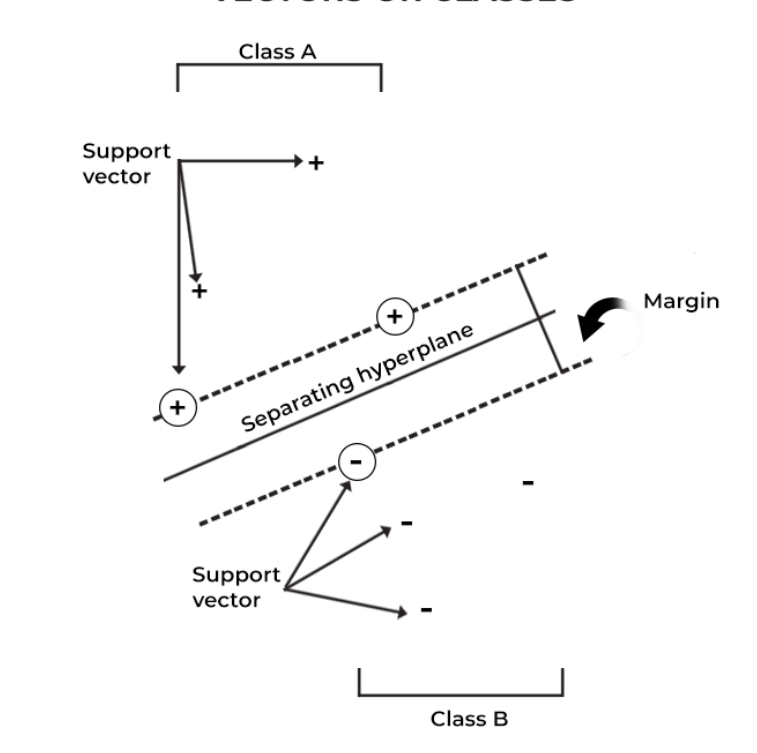

In [ ]:
Image('svm.png',width = 1200)

In [ ]:
uploaded = files.upload()

# Naive Bayes



As seen in the above figure, the margin refers to the maximum width of the slice that runs parallel to the hyperplane without any internal support vectors. Such hyperplanes are easier to define for linearly separable problems; however, for real-life problems or scenarios, the SVM algorithm tries to maximize the margin between the support vectors, thereby giving rise to incorrect classifications for smaller sections of data points.

SVMs are potentially designed for binary classification problems. However, with the rise in computationally intensive multiclass problems, several binary classifiers are constructed and combined to formulate SVMs that can implement such multiclass classifications through binary means.

The working of a support vector machine can be better understood through an example. Let’s assume we have red and black labels with the features denoted by x and y. We intend to have a classifier for these tags that classifies data into either the red or black category.

Let’s plot the labeled data on an x-y plane, as below:

A typical SVM separates these data points into red and black tags using the hyperplane, which is a two-dimensional line in this case. The hyperplane denotes the decision boundary line, wherein data points fall under the red or black category.

A hyperplane is defined as a line that tends to widen the margins between the two closest tags or labels (red and black). The distance of the hyperplane to the most immediate label is the largest, making the data classification easier.

The above scenario is applicable for linearly separable data. However, for non-linear data, a simple straight line cannot separate the distinct data points.

Here’s an example of non-linear complex dataset data:

The above dataset reveals that a single hyperplane is not sufficient to separate the involved labels or tags. However, here, the vectors are visibly distinct, making segregating them easier.

For data classification, you need to add another dimension to the feature space. For linear data discussed until this point, two dimensions of x and y were sufficient. In this case, we add a z-dimension to better classify the data points. Moreover, for convenience, let’s use the equation for a circle, z = x² + y².

With the third dimension, the slice of feature space along the z-direction looks like this:

Now, with three dimensions, the hyperplane, in this case, runs parallel to the x-direction at a particular value of z; let’s consider it as z=1.

The remaining data points are further mapped back to two dimensions.

The above figure reveals the boundary for data points along features x, y, and z along a circle of the circumference with radii of 1 unit that segregates two labels of tags via the SVM.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the dataset
data = pd.read_csv('spam.csv', encoding='latin-1')

# Simplify dataset by selecting only the relevant columns and renaming them
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

# Preprocess labels: 'ham' to 0 and 'spam' to 1
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

# Define a pipeline with a TF-IDF vectorizer and an SVM classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('svm', SVC(kernel='linear', probability=True))  # Using linear kernel and enabling probability estimates
])

# Train the SVM model
pipeline.fit(X_train, y_train)

# Predict the labels for the test set
predictions = pipeline.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(y_test, predictions, target_names=['Ham', 'Spam'])
print(report)

# Example of predicting new messages
new_messages = ["Click on this link to accept this offer", "Oh my god I totally dislike that girl she's so rude"]
new_predictions = pipeline.predict(new_messages)
new_probabilities = pipeline.predict_proba(new_messages)

# Display predictions and probabilities for the new messages
for message, prediction, probability in zip(new_messages, new_predictions, new_probabilities):
    print(f"Message: '{message}'")
    print("Predicted class:", "Ham" if prediction == 0 else "Spam")
    print(f"Probability: Ham={probability[0]:.2f}, Spam={probability[1]:.2f}\n")

Accuracy: 0.979372197309417
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       965
        Spam       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Message: 'Click on this link to accept this offer'
Predicted class: Spam
Probability: Ham=0.14, Spam=0.86

Message: 'Oh my god I totally dislike that girl she's so rude'
Predicted class: Ham
Probability: Ham=0.99, Spam=0.01



In [ ]:
uploaded = files.upload()

Saving Screenshot 2024-03-04 124203.png to Screenshot 2024-03-04 124203.png


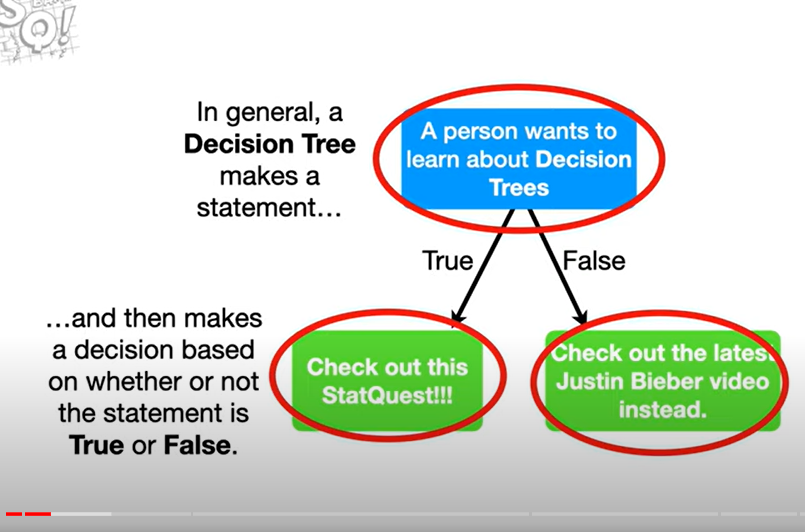

In [ ]:
Image('Screenshot 2024-03-04 124203.png',width = 1200)

This kind of decision tree is called a classification tree. A classification combines numeric data and classification yes/no data. The top of the tree is called root node. The arrows are called branches and the other nodes are called leaves.

In [ ]:
uploaded = files.upload()

Saving Screenshot 2024-03-04 125036.png to Screenshot 2024-03-04 125036.png


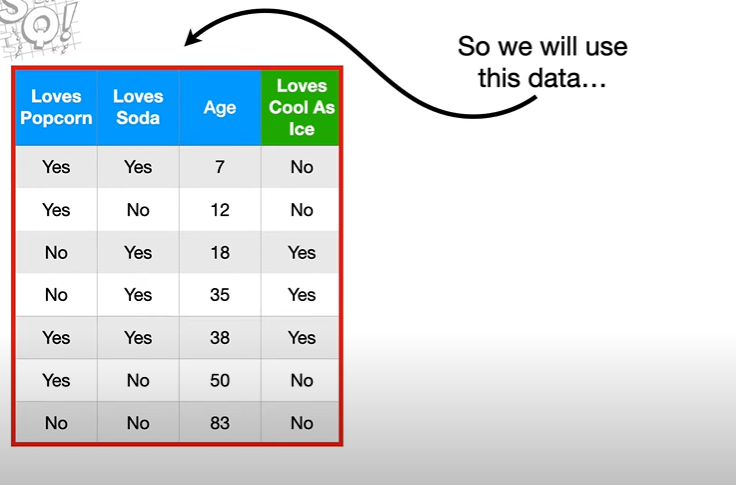

In [ ]:
Image('Screenshot 2024-03-04 125036.png',width = 1200)

Steps to create a decision tree:

1. Select the target variable. In this case it is 'Loves cool as ice'.
2. Evaluate the other columns like 'Loves Soda' and 'Loves Popcorn'.
3. Now see is there any specific pattern between them and how they effect the target variable. For example, if a person likes soda he almost always doesn't like 'Cool as ice'.


In [ ]:
uploaded = files.upload()

Saving Screenshot 2024-03-04 125430.png to Screenshot 2024-03-04 125430.png


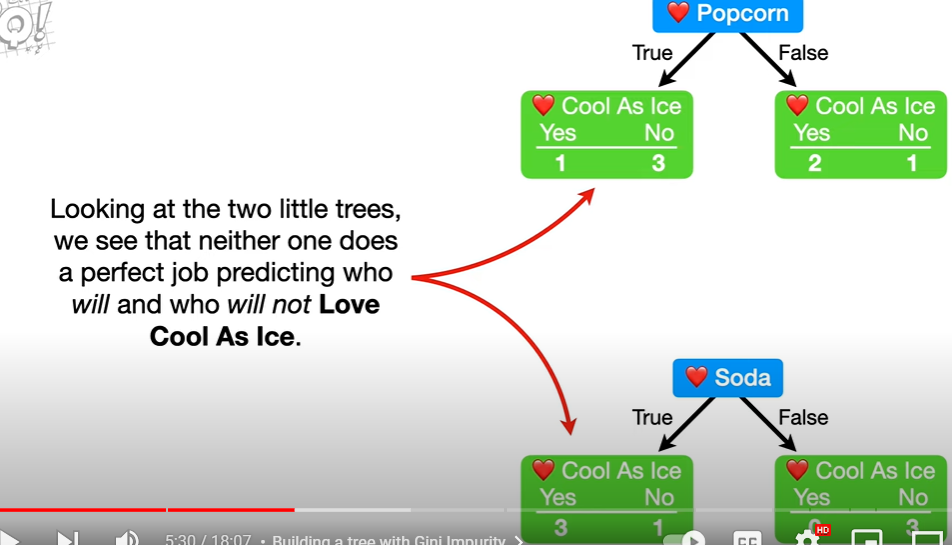

In [ ]:
Image('Screenshot 2024-03-04 125430.png',width = 1200)

Now you can clearly see that because there is no particular negative or positive correlation in three of the nodes it means they are impure. Then we can quantify the impurity by calculating the ginny impurity.

The biggest difference between the models you're building from a "features" point of view is that Naive Bayes treats them as independent, whereas SVM looks at the interactions between them to a certain degree, as long as you're using a non-linear kernel (Gaussian, rbf, poly etc.). So if you have interactions, and, given your problem, you most likely do, an SVM will be better at capturing those, hence better at the classification task you want.

In [ ]:
uploaded = files.upload()

Saving svmmath.png to svmmath.png


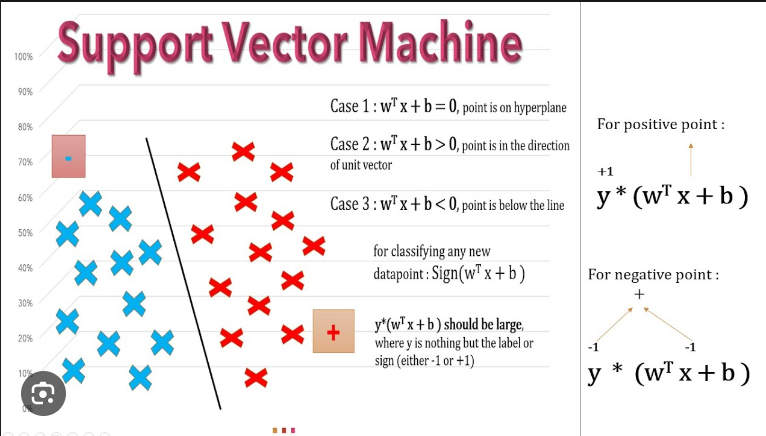

In [ ]:
Image('svmmath.png',width = 1200)

# How to Calculate Ginny Index

CART
It is used for generating both classification tree and regression tree.
It uses Gini index as metric/cost function to evaluate split in feature selection in case of classification tree.
It is used for binary classification.
It use least square as a metric to select features in case of Regression tree.
Lets start with generating classification tree.

Lets start with weather data set, which is quite famous in explaining decision tree algorithm,where target is to predict play or not( Yes or No) based on weather condition.


From data, outlook, temperature, humidity, wind are the features of data.

So, lets start building tree,

Outlook
Outlook is a nominal feature. it can take three value, sunny, overcast and rain. Lets summarize the final decision for outlook features,


Gini index (outlook=sunny)= 1-(2/5)²-(3/5)² = 1- 0.16–0.36 = 0.48

Gini index(outlook=overcast)= 1- (4/4)²-(0/4)² = 1- 1- 0 = 0

Gini index(outlook=rainfall)= 1- (3/5)² -(2/5)² = 1- 0.36- 0.16 = 0.48

Now , we will calculate the weighted sum of Gini index for outlook features,

Gini(outlook) = (5/14)*0.48 + (4/14) *0 + (5/14)*0.48 = 0.342

Temperature
Similarly, temperature is also a nominal feature, it can take three values, hot,cold and mild. lets summarize the final decision of temperature feature,


Gini(temperature=hot) = 1-(2/4)²-(2/4)² = 0.5

Gini(temperature=cool) = 1-(3/4)²-(1/4)² = 0.375

Gini(temperature=mild) = 1-(4/6)²-(2/6)² = 0.445

Now, the weighted sum of Gini index for temperature features can be calculated as,

Gini(temperature)= (4/14) *0.5 + (4/14) *0.375 + (6/14) *0.445 =0.439

Humidity

Humidity is a binary class feature , it can take two value high and normal.

Gini(humidity=high) = 1-(3/7)²-(4/7)² = 0.489

Gini(humidity=normal) = 1-(6/7)²-(1/7)² = 0.244

Now, the weighted sum of Gini index for humidity features can be calculated as,

Gini(humidity) = (7/14) *0.489 + (7/14) *0.244=0.367

Wind

wind is a binary class feature , it can take two value weak and strong.

Gini(wind=weak)= 1-(6/8)²-(2/8)² = 0.375

Gini(wind=strong)= 1-(3/6)²-(3/6)²= 0.5

Now, the weighted sum of Gini index for wind features can be calculated as,

Gini(wind) = (8/14) *0.375 + (6/14) *0.5=0.428

Decision for root node
So,the final decision of all the features,


From table, you can seen that Gini index for outlook feature is lowest. So we get our root node.






Gini index for temperature on sunny outlook

Gini(outlook=sunny & temperature=hot) = 1-(0/2)²-(2/2)² = 0

Gini(outlook=sunny & temperature=cool) = 1-(1/1)²-(0/1)² = 0

Gini(outlook=sunny & temperature=mild) = 1-(1/2)²-(1/2)² = 0.5

Now, the weighted sum of Gini index for temperature on sunny outlook features can be calculated as,

Gini(outlook=sunny & temperature)= (2/5) *0 + (1/5) *0+ (2/5) *0.5 =0.2

Gini Index for humidity on sunny outlook

Gini(outlook=sunny & humidity=high) = 1-(0/3)²-(3/3)² = 0

Gini(outlook=sunny & humidity=normal) = 1-(2/2)²-(0/2)² = 0

Now, the weighted sum of Gini index for humidity on sunny outlook features can be calculated as,

Gini(outlook = sunny & humidity) = (3/5) *0 + (2/5) *0=0

Gini Index for wind on sunny outlook

Gini(outlook=sunny & wind=weak) = 1-(1/3)²-(2/3)² = 0.44

Gini(outlook=sunny & wind=strong) = 1-(1/2)²-(1/2)² = 0.5

Now, the weighted sum of Gini index for wind on sunny outlook features can be calculated as,

Gini(outlook = sunny and wind) = (3/5) *0.44 + (2/5) *0.5=0.266+0.2= 0.466

Decision on sunny outlook factor

we have calculated the Gini index of all the features when the outlook is sunny. You can infer that humidity has lowest value. so next node will be humidity.


Now,Lets focus on sub data for overcast outlook feature.


As, you can see from the above table all the decision for overcast outlook feature is always ‘Yes’. Then Gini index for each feature is 0, means it is a leaf nodes.


Now,Lets focus on sub data for high and normal humidity feature.



From the given two table, the decision is always ‘No’ when humidity is ‘high’ and decision is always ‘Yes’ when humidity is ‘normal’. So we got leaf node. now decision tree can be viewed as,


Now,Lets focus on sub data for rainfall outlook feature. we need to find the Gini index for temperature,humidity and wind feature respectively.


Gini index for temperature for rainfall outlook

Gini(outlook=rainfall and temp.=Cool) = 1 — (1/2)2 — (1/2)2 = 0.5

Gini(outlook=rainfall and temp.=Mild) = 1 — (2/3)2 — (1/3)2 = 0.444

Gini(outlook=rainfall and temp.) = (2/5)*0.5 + (3/5)*0.444 = 0.466

Gini index for humidity for rainfall outlook

Gini(outlook=rainfall and humidity=high) = 1 — (1/2)2 — (1/2)2 = 0.5

Gini(outlook=rainfall and humidity=normal) = 1 — (2/3)2 — (1/3)2 = 0.444

Gini(Outlook=rainfall and humidity) = (2/5)*(0.5 + (3/5)*0.444 = 0.466

Gini index for wind for rainfall outlook feature

Gini(outlook=rainfall and wind=weak) = 1 — (3/3)2 — (0/3)2 = 0

Gini(outlook=rainfall and wind=strong) = 1 — (0/2)2 — (2/2)2 = 0

Gini(outlook=rainfall and wind) = (3/5)*0 + (2/5)*0 = 0

Decision on rainfall outlook factor

we have calculated the Gini index of all the features when the outlook is rainfall. You can infer that wind has lowest value. so next node will be wind.


Now,Lets focus on sub data strong and weak for wind rainfall feature.



From the above two table, the decision is always ‘No’ when wind is ‘strong’ and decision is always ‘Yes’ when wind is ‘weak’. So we got leaf node.


So, we have explained the generation of decision tree in step by step manner.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the dataset
data = pd.read_csv('spam.csv', encoding='latin-1')

# Simplify dataset by selecting only the relevant columns and renaming them
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

# Preprocess labels: 'ham' to 0 and 'spam' to 1
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

# Define a pipeline with a TF-IDF vectorizer and a Decision Tree classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('dt', DecisionTreeClassifier())  # Using Decision Tree classifier
])

# Train the Decision Tree model
pipeline.fit(X_train, y_train)

# Predict the labels for the test set
predictions = pipeline.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(y_test, predictions, target_names=['Ham', 'Spam'])
print(report)

# Example of predicting new messages
new_messages = ["Click on this link to accept this offer", "Oh my god I totally dislike that girl she's so rude"]
new_predictions = pipeline.predict(new_messages)

# Display predictions for the new messages
for message, prediction in zip(new_messages, new_predictions):
    print(f"Message: '{message}'")
    print("Predicted class:", "Ham" if prediction == 0 else "Spam")

Accuracy: 0.9668161434977578
              precision    recall  f1-score   support

         Ham       0.98      0.99      0.98       965
        Spam       0.91      0.84      0.87       150

    accuracy                           0.97      1115
   macro avg       0.94      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Message: 'Click on this link to accept this offer'
Predicted class: Ham
Message: 'Oh my god I totally dislike that girl she's so rude'
Predicted class: Ham


A Random Forest consists of multiple decision trees. It's called a "forest" because it's made up of many individual decision trees. Each tree in the Random Forest is constructed independently based on a random subset of the training data and a random subset of features. During prediction, the results of all trees are aggregated to produce the final prediction.

The key idea behind Random Forest is to introduce randomness in the tree construction process to decorrelate the individual trees, reduce overfitting, and improve the model's generalization performance. By combining the predictions from multiple trees, Random Forests tend to be more accurate and robust compared to a single decision tree.

 In a Random Forest, each decision tree in the ensemble independently makes a prediction based on the input features. When it comes to making predictions for a new data point:

Classification: Each decision tree predicts the class label for the new data point. For example, if there are 100 decision trees in the Random Forest, each tree will independently assign a class label to the input data point.

Regression: Similarly, for regression tasks, each decision tree predicts a numerical value for the new data point.

Once predictions are obtained from all individual trees:

Classification: The final prediction for classification is determined by taking a majority vote among all the predictions made by the individual trees. The class label that receives the most votes (i.e., the mode) across all trees is selected as the final prediction.

Regression: For regression tasks, the final prediction is typically calculated as the average (mean) of all the predictions made by the individual trees.

By aggregating the predictions from multiple trees, the Random Forest reduces the impact of individual noisy or overfitting trees and provides a more robust and accurate prediction. This ensemble approach helps to smooth out potential errors and biases in individual predictions, leading to better overall performance.






In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the dataset
data = pd.read_csv('spam.csv', encoding='latin-1')

# Simplify dataset by selecting only the relevant columns and renaming them
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

# Preprocess labels: 'ham' to 0 and 'spam' to 1
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

# Define a pipeline with a TF-IDF vectorizer and a Random Forest classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('rf', RandomForestClassifier(n_estimators=100))  # Using Random Forest classifier with 100 trees
])

# Train the Random Forest model
pipeline.fit(X_train, y_train)

# Predict the labels for the test set
predictions = pipeline.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(y_test, predictions, target_names=['Ham', 'Spam'])
print(report)

# Example of predicting new messages
new_messages = ["Click on this link to accept this offer", "Oh my god I totally dislike that girl she's so rude"]
new_predictions = pipeline.predict(new_messages)

# Display predictions for the new messages
for message, prediction in zip(new_messages, new_predictions):
    print(f"Message: '{message}'")
    print("Predicted class:", "Ham" if prediction == 0 else "Spam")

Accuracy: 0.9757847533632287
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       965
        Spam       0.98      0.84      0.90       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.94      1115
weighted avg       0.98      0.98      0.98      1115

Message: 'Click on this link to accept this offer'
Predicted class: Ham
Message: 'Oh my god I totally dislike that girl she's so rude'
Predicted class: Ham


# Comparing all four Algorithms

Decision tree vs Random Forest :

Random Forest is a collection of decision trees and average/majority vote of the forest is selected as the predicted output.
Random Forest model will be less prone to overfitting than Decision tree, and gives a more generalized solution.
Random Forest is more robust and accurate than decision trees.

# SVM vs Random Forest

Effective in High-dimensional Spaces: SVM performs well even in high-dimensional feature spaces. This makes it suitable for datasets with a large number of features, where maintaining performance and avoiding the curse of dimensionality is crucial. SVM achieves this by finding the optimal hyperplane that separates classes, which can be highly effective even when the number of features is much larger than the number of samples.

Robust against Overfitting: SVM aims to maximize the margin between classes, which leads to good generalization performance and robustness against overfitting, especially in scenarios where the dataset is noisy or the class distributions are imbalanced. By maximizing the margin, SVM seeks a decision boundary that maintains a large gap between classes, reducing the likelihood of capturing noise or outliers in the training data. This robustness is particularly advantageous when working with complex datasets where maintaining a balance between model complexity and generalization is crucial.

# Conclusion

Accuracies of Each algorithm to predict whether or not the message is a spam or a ham:

Naive Bayes - 0.974
SVM - 0.979
Decision trees - 0.96
Random Forest - 0.975

# References

1. Comparing algorithms - https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222

2. Image content - https://www.youtube.com/watch?v=_L39rN6gz7Y

3. Naive Bayes - https://www.ibm.com/topics/naive-bayes#:~:text=The%20Na%C3%AFve%20Bayes%20classifier%20is,a%20given%20class%20or%20category.

4. SVM Classifier - https://scikit-learn.org/stable/modules/svm.html
5. Random Forest - https://www.youtube.com/watch?v=J4Wdy0Wc_xQ


